In [1]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import numpy as np
import random

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from CNN_module.model import training_model

In [2]:
My_Seed = 72

os.environ["PYTHONHASHSEED"] = str(My_Seed)
#s.environ["TF_DETERMINISTIC_OPS"] = '1'

tf.random.set_seed(My_Seed)
np.random.seed(My_Seed)
random.seed(My_Seed)

batch_size = 4
epochs = 10000

train_path = 'Train_data_set/train'
validation_path = "Train_data_set/val"
test_path = "Train_data_set/test"

## train data : val data : test data = 8 : 1 : 1 

In [3]:
data_generator = ImageDataGenerator(rescale = 1/255)

train_generator = data_generator.flow_from_directory(train_path, target_size = (400, 401), color_mode = "grayscale", class_mode = 'binary', batch_size = 1)
n_img = train_generator.n
steps = n_img//1

imgs, labels = [], []

for i in range(steps):
    a, b = train_generator.next()
    imgs.extend(a)
    labels.extend(b)

X_train = np.asarray(imgs)
y_train = np.asarray(labels)

Found 979 images belonging to 2 classes.


In [4]:
data_generator = ImageDataGenerator(rescale = 1/255)

train_generator = data_generator.flow_from_directory(validation_path, target_size = (400, 401), color_mode = "grayscale", class_mode = 'binary', batch_size = 1)
n_img = train_generator.n
steps = n_img//1

imgs, labels = [], []

for i in range(steps):
    a, b = train_generator.next()
    imgs.extend(a)
    labels.extend(b)

X_val = np.asarray(imgs)
y_val = np.asarray(labels)

Found 122 images belonging to 2 classes.


In [5]:
data_generator = ImageDataGenerator(rescale = 1/255)

train_generator = data_generator.flow_from_directory(test_path, target_size = (400, 401), color_mode = "grayscale", class_mode = 'binary', batch_size = 1)
n_img = train_generator.n
steps = n_img//1

imgs, labels = [], []

for i in range(steps):
    a, b = train_generator.next()
    imgs.extend(a)
    labels.extend(b)

X_test = np.asarray(imgs)
y_test = np.asarray(labels)

Found 124 images belonging to 2 classes.


Epoch 1/10000
245/245 [==============================] - ETA: 0s - loss: 0.6713 - binary_accuracy: 0.5802
Epoch 1: val_loss improved from inf to 0.65704, saving model to train_model(400X401)/CNN(train).h5
245/245 [==============================] - 7s 15ms/step - loss: 0.6713 - binary_accuracy: 0.5802 - val_loss: 0.6570 - val_binary_accuracy: 0.6967
Epoch 2/10000
243/245 [============================>.] - ETA: 0s - loss: 0.6419 - binary_accuracy: 0.6440
Epoch 2: val_loss improved from 0.65704 to 0.64797, saving model to train_model(400X401)/CNN(train).h5
245/245 [==============================] - 3s 12ms/step - loss: 0.6398 - binary_accuracy: 0.6456 - val_loss: 0.6480 - val_binary_accuracy: 0.6066
Epoch 3/10000
241/245 [============================>.] - ETA: 0s - loss: 0.6260 - binary_accuracy: 0.6452
Epoch 3: val_loss did not improve from 0.64797
245/245 [==============================] - 3s 12ms/step - loss: 0.6264 - binary_accuracy: 0.6456 - val_loss: 0.6512 - val_binary_accuracy: 0.

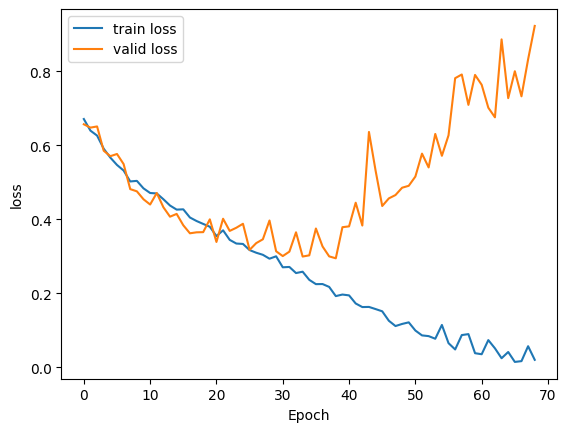

In [6]:
history = training_model('CNN', 0.0001, batch_size, epochs, X_train, X_val, y_train, y_val, 'train_data')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()

Epoch 1/10000
245/245 [==============================] - ETA: 0s - loss: 0.6922 - binary_accuracy: 0.5475
Epoch 1: val_loss improved from inf to 0.68602, saving model to train_model(400X401)/VGG16(train).h5
245/245 [==============================] - 32s 122ms/step - loss: 0.6922 - binary_accuracy: 0.5475 - val_loss: 0.6860 - val_binary_accuracy: 0.6393
Epoch 2/10000
245/245 [==============================] - ETA: 0s - loss: 0.6649 - binary_accuracy: 0.5935
Epoch 2: val_loss improved from 0.68602 to 0.67379, saving model to train_model(400X401)/VGG16(train).h5
245/245 [==============================] - 29s 117ms/step - loss: 0.6649 - binary_accuracy: 0.5935 - val_loss: 0.6738 - val_binary_accuracy: 0.5738
Epoch 3/10000
245/245 [==============================] - ETA: 0s - loss: 0.6521 - binary_accuracy: 0.6313
Epoch 3: val_loss improved from 0.67379 to 0.65420, saving model to train_model(400X401)/VGG16(train).h5
245/245 [==============================] - 28s 116ms/step - loss: 0.6521 - 

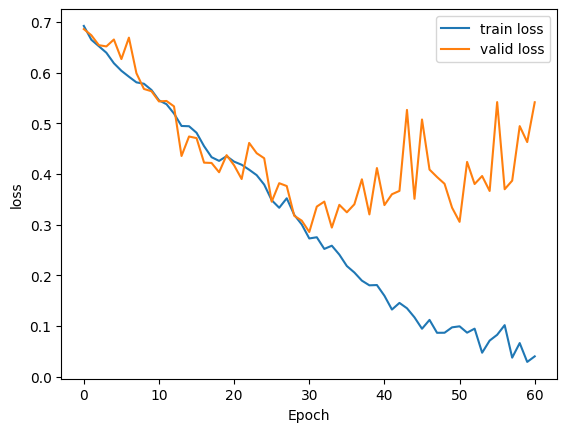

In [7]:
history = training_model('VGG16', 0.00001, batch_size, epochs, X_train, X_val, y_train, y_val, 'train_data')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()

Epoch 1/10000
245/245 [==============================] - ETA: 0s - loss: 0.8534 - binary_accuracy: 0.5414
Epoch 1: val_loss improved from inf to 2.80262, saving model to train_model(400X401)/ResNet50(train).h5
245/245 [==============================] - 24s 75ms/step - loss: 0.8534 - binary_accuracy: 0.5414 - val_loss: 2.8026 - val_binary_accuracy: 0.4754
Epoch 2/10000
245/245 [==============================] - ETA: 0s - loss: 0.6754 - binary_accuracy: 0.6180
Epoch 2: val_loss improved from 2.80262 to 1.44132, saving model to train_model(400X401)/ResNet50(train).h5
245/245 [==============================] - 16s 67ms/step - loss: 0.6754 - binary_accuracy: 0.6180 - val_loss: 1.4413 - val_binary_accuracy: 0.4754
Epoch 3/10000
244/245 [============================>.] - ETA: 0s - loss: 0.6904 - binary_accuracy: 0.6322
Epoch 3: val_loss improved from 1.44132 to 0.66790, saving model to train_model(400X401)/ResNet50(train).h5
245/245 [==============================] - 16s 67ms/step - loss: 0.6

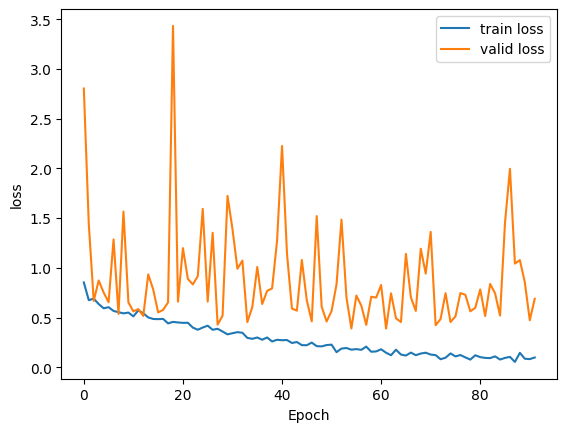

In [8]:
history = training_model('ResNet50', 0.0001, batch_size, epochs, X_train, X_val, y_train, y_val, 'train_data')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()

Epoch 1/10000
245/245 [==============================] - ETA: 0s - loss: 0.7085 - binary_accuracy: 0.5455
Epoch 1: val_loss improved from inf to 0.69697, saving model to train_model(400X401)/EfficientNet-B0(train).h5
245/245 [==============================] - 37s 103ms/step - loss: 0.7085 - binary_accuracy: 0.5455 - val_loss: 0.6970 - val_binary_accuracy: 0.4754
Epoch 2/10000
245/245 [==============================] - ETA: 0s - loss: 0.6735 - binary_accuracy: 0.5965
Epoch 2: val_loss did not improve from 0.69697
245/245 [==============================] - 22s 89ms/step - loss: 0.6735 - binary_accuracy: 0.5965 - val_loss: 0.7403 - val_binary_accuracy: 0.4754
Epoch 3/10000
245/245 [==============================] - ETA: 0s - loss: 0.6349 - binary_accuracy: 0.6496
Epoch 3: val_loss did not improve from 0.69697
245/245 [==============================] - 22s 88ms/step - loss: 0.6349 - binary_accuracy: 0.6496 - val_loss: 0.6996 - val_binary_accuracy: 0.4672
Epoch 4/10000
245/245 [============

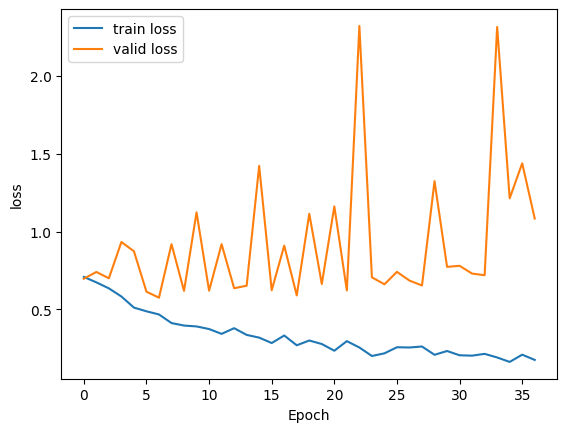

In [6]:
history = training_model('EfficientNet-B0', 0.00005, batch_size, epochs, X_train, X_val, y_train, y_val, 'train_data')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()